In [51]:
import pandas as pd
import numpy as np

activities = pd.read_csv("./../../data/activitats.csv", encoding='ISO-8859-1')
marks = pd.read_csv("./../../data/notes.csv", delimiter=';')
submision = pd.read_csv("./../../data/trameses.csv")


In [27]:
marks.head()

,userid,aula_id,P_Grade,P_Grade_Date,F_Grade,F_Grade_Date,R_Grade,R_Grade_Date
0,176,92,NaN,NaN,"9,25",1667829600,NaN,1675173600
1,179,92,NaN,NaN,"7,75",1667829600,NaN,1675173600
2,168,92,NaN,NaN,"7,75",1667829600,NaN,1675173600
3,401,92,NaN,NaN,"3,50",1667829600,"8,25",1675173600
4,482,92,NaN,NaN,"7,00",1667829600,NaN,1675173600


Academic Record

In [47]:
def Academic_Record(user_id):
    marks_user = marks[(marks["userid"] == user_id)]

    #Transforma los formatos de fecha UNIX
    marks_user.loc[:,'P_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'P_Grade_Date'], unit='s').dt.date
    marks_user.loc[:,'F_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'F_Grade_Date'], unit='s').dt.date
    marks_user.loc[:,'R_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'R_Grade_Date'], unit='s').dt.date

    #Obtiene la nota y fecha de convocatoria finales (se actualiza la nota final en caso de hacerse recuperacion)
    marks_user['Nota_Final'] = np.where(marks_user['R_Grade'].notna(), marks_user['R_Grade'], marks_user['F_Grade'])
    marks_user['Fecha_Final'] = np.where(marks_user['R_Grade'].notna(), marks_user['R_Grade_Date'], marks_user['F_Grade_Date'])

    #Filtra los campos finales
    marks_user_record = marks_user[["aula_id", "Nota_Final", "Fecha_Final"]]

    return marks_user_record

In [39]:
Academic_Record(155)

C:\Users\Aleix\AppData\Local\Temp\ipykernel_8884\2348586516.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[datetime.date(2022, 11, 7) datetime.date(2023, 11, 13)]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  marks_user.loc[:,'F_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'F_Grade_Date'], unit='s').dt.date
C:\Users\Aleix\AppData\Local\Temp\ipykernel_8884\2348586516.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[datetime.date(2023, 1, 31) datetime.date(2024, 1, 25)]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  marks_user.loc[:,'R_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'R_Grade_Date'], unit='s').dt.date
C:\Users\Aleix\AppData\Local\Temp\ipykernel_8884\2348586516.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,aula_id,Nota_Final,Fecha_Final
34,92,"5,75",2022-11-07
352,143,"8,65",2023-11-13


Datos asignatura y user id

In [45]:
def Academic_Record_Subject(user_id, aula_id):
    marks_user = marks[(marks["userid"] == user_id)]

    #Transforma los formatos de fecha UNIX
    marks_user.loc[:,'P_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'P_Grade_Date'], unit='s').dt.date
    marks_user.loc[:,'F_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'F_Grade_Date'], unit='s').dt.date
    marks_user.loc[:,'R_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'R_Grade_Date'], unit='s').dt.date

    return marks_user[marks["aula_id"] == aula_id]

In [48]:
Academic_Record_Subject(155, 92)

C:\Users\Aleix\AppData\Local\Temp\ipykernel_8884\2234939358.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['NaT', 'NaT']
Length: 2, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  marks_user.loc[:,'P_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'P_Grade_Date'], unit='s').dt.date
C:\Users\Aleix\AppData\Local\Temp\ipykernel_8884\2234939358.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[datetime.date(2022, 11, 7) datetime.date(2023, 11, 13)]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  marks_user.loc[:,'F_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'F_Grade_Date'], unit='s').dt.date
C:\Users\Aleix\AppData\Local\Temp\ipykernel_8884\2234939358.py:7: FutureWarning: Setting an item of incompatible dtype is dep

,userid,aula_id,P_Grade,P_Grade_Date,F_Grade,F_Grade_Date,R_Grade,R_Grade_Date
34,155,92,NaN,NaT,"5,75",2022-11-07,NaN,2023-01-31


Tablas Trameses

In [134]:
def pie_chart_submissions_user(user_id):
    submissions =  pd.read_csv("./../../data/dataset.csv")
    submissions = submissions[['userid', 'aula_id', 'activitat',"activitat_id", 'datesubmitted', 'attempt_number', 'mark', 'count_activities']]
    submissions

    submissions_user = submissions[submissions["userid"] == user_id]
    submissions_user

    conteo_por_aula = submissions_user.groupby('aula_id').size()

    # Convertir el conteo a un DataFrame y renombrar la columna
    conteo_por_aula = conteo_por_aula.rename('conteo_registros').reset_index()

    # Unir el conteo como una nueva columna en el DataFrame original
    submissions_user = submissions_user.merge(conteo_por_aula, on='aula_id', how='left')
    submissions_user['diferencia'] = submissions_user['count_activities'] - submissions_user['conteo_registros']



    # Paso 2: Contar registros por aula_id y agregarlo como columna 'conteo_registros'
    # Agrupamos el DataFrame submissions_user por 'aula_id' y contamos el número de registros en cada grupo
    conteo_por_aula = submissions_user.groupby('aula_id').size()

    # Renombramos la serie a 'conteo_registros' y la convertimos en un DataFrame
    conteo_por_aula = conteo_por_aula.rename('conteo_registros').reset_index()

    # Eliminar la columna 'conteo_registros' si ya existe en submissions_user
    if 'conteo_registros' in submissions_user.columns:
        submissions_user = submissions_user.drop(columns=['conteo_registros'])

    # Realizamos un merge con submissions_user para agregar el conteo de registros como una nueva columna
    submissions_user = submissions_user.merge(conteo_por_aula, on='aula_id', how='left')

    # Paso 3: Crear la columna 'diferencia' como la resta entre 'count_activities' y 'conteo_registros'
    # Restamos la columna 'conteo_registros' de 'count_activities' y guardamos el resultado en una nueva columna 'diferencia'
    submissions_user['diferencia'] = submissions_user['count_activities'] - submissions_user['conteo_registros']

    # Paso 4: Calcular suma_valores_distintos, la suma de los valores únicos en 'diferencia'
    # Obtenemos los valores únicos en la columna 'diferencia' y calculamos su suma
    suma_valores_distintos = submissions_user['diferencia'].unique().sum()
    




    count_mark_1 = (submissions_user['mark'] == 1).sum()

    # Contar el número de registros donde mark es igual a 0
    count_mark_0 = (submissions_user['mark'] == 0).sum()

    # Contar el número de registros donde mark está entre 0 y 1
    count_between_0_and_1 = ((submissions_user['mark'] > 0) & (submissions_user['mark'] < 1)).sum()


    sizes = [count_mark_1, count_between_0_and_1, count_mark_0, suma_valores_distintos]
    labels = ['10', 'Other', '0',  'NaN']
    colors = ['#8BC34A', '#FFC107', '#FF4C4C', '#696969']  # Verde, rojo, amarillo, gris oscuro (DimGray)

    # Crear el gráfico circular
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )

    # Asegurarse de que el gráfico sea circular
    plt.axis('equal')

    # # Añadir la leyenda
    # plt.legend(labels, loc="best", title="Categorías")

    # Mostrar el gráfico
    plt.show()

C:\Users\Aleix\AppData\Local\Temp\ipykernel_7204\4176651102.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions =  pd.read_csv("./../../data/dataset.csv")


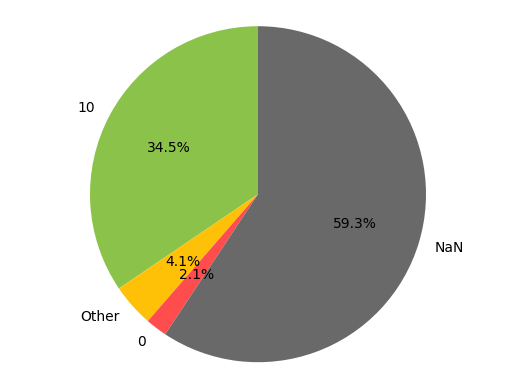

In [135]:
pie_chart_submissions_user(155)

In [136]:
 def pie_chart_submissions_user_aula(user_id, aula_id):
    submissions =  pd.read_csv("./../../data/dataset.csv")
    submissions = submissions[['userid', 'aula_id', 'activitat',"activitat_id", 'datesubmitted', 'attempt_number', 'mark', 'count_activities']]


    submissions_user = submissions[submissions["userid"] == user_id]
    submissions_user = submissions_user[ submissions_user["aula_id"] == aula_id]
    submissions_user

    conteo_por_aula = submissions_user.groupby('aula_id').size()

    # Convertir el conteo a un DataFrame y renombrar la columna
    conteo_por_aula = conteo_por_aula.rename('conteo_registros').reset_index()

    # Unir el conteo como una nueva columna en el DataFrame original
    submissions_user = submissions_user.merge(conteo_por_aula, on='aula_id', how='left')
    submissions_user['diferencia'] = submissions_user['count_activities'] - submissions_user['conteo_registros']



    # Paso 2: Contar registros por aula_id y agregarlo como columna 'conteo_registros'
    # Agrupamos el DataFrame submissions_user por 'aula_id' y contamos el número de registros en cada grupo
    conteo_por_aula = submissions_user.groupby('aula_id').size()

    # Renombramos la serie a 'conteo_registros' y la convertimos en un DataFrame
    conteo_por_aula = conteo_por_aula.rename('conteo_registros').reset_index()

    # Eliminar la columna 'conteo_registros' si ya existe en submissions_user
    if 'conteo_registros' in submissions_user.columns:
        submissions_user = submissions_user.drop(columns=['conteo_registros'])

    # Realizamos un merge con submissions_user para agregar el conteo de registros como una nueva columna
    submissions_user = submissions_user.merge(conteo_por_aula, on='aula_id', how='left')

    # Paso 3: Crear la columna 'diferencia' como la resta entre 'count_activities' y 'conteo_registros'
    # Restamos la columna 'conteo_registros' de 'count_activities' y guardamos el resultado en una nueva columna 'diferencia'
    submissions_user['diferencia'] = submissions_user['count_activities'] - submissions_user['conteo_registros']

    # Paso 4: Calcular suma_valores_distintos, la suma de los valores únicos en 'diferencia'
    # Obtenemos los valores únicos en la columna 'diferencia' y calculamos su suma
    suma_valores_distintos = submissions_user['diferencia'].unique().sum()
    




    count_mark_1 = (submissions_user['mark'] == 1).sum()

    # Contar el número de registros donde mark es igual a 0
    count_mark_0 = (submissions_user['mark'] == 0).sum()

    # Contar el número de registros donde mark está entre 0 y 1
    count_between_0_and_1 = ((submissions_user['mark'] > 0) & (submissions_user['mark'] < 1)).sum()
    

    sizes = [count_mark_1, count_between_0_and_1, count_mark_0, suma_valores_distintos]
    labels = ['10', 'Other', '0',  'NaN']
    colors = ['#8BC34A', '#FFC107', '#FF4C4C', '#696969']  # Verde, rojo, amarillo, gris oscuro (DimGray)

    # Crear el gráfico circular
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )

    # Asegurarse de que el gráfico sea circular
    plt.axis('equal')

    # # Añadir la leyenda
    # plt.legend(labels, loc="best", title="Categorías")

    # Mostrar el gráfico
    plt.show()

C:\Users\Aleix\AppData\Local\Temp\ipykernel_7204\795910829.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions =  pd.read_csv("./../../data/dataset.csv")


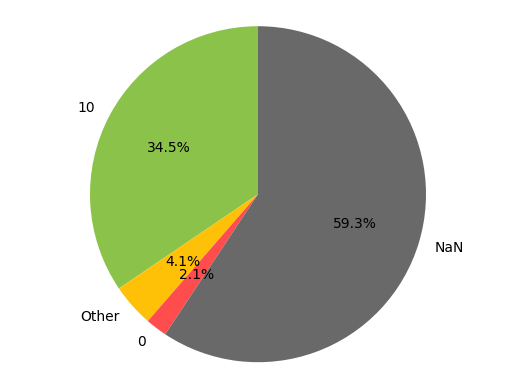

In [137]:
pie_chart_submissions_user_aula(155, 92)

In [45]:
def submissions_user_hist(user_id):
    
    submissions =  pd.read_csv("./../../data/dataset.csv")
    submissions = submissions[['userid', 'aula_id', 'activitat',"activitat_id", 'datesubmitted', 'attempt_number', 'mark']]
    submissions

    submissions_user = submissions[submissions["userid"] == user_id]
    submissions_user

    # Crear el histograma con un estilo minimalista
    plt.hist(submissions_user['mark'], bins=10, color='#c09268', edgecolor='black')

    # Remover los bordes y mantener solo el gráfico
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)

    # Solo mostrar ticks en el eje x
    plt.tick_params(axis='y', which='both', left=True, right=False)
    plt.tick_params(axis='x', which='both', bottom=True, top=False)

    # Etiquetas para el eje x y el título
    plt.xlabel('Mark')

    # Mostrar el gráfico
    return plt

C:\Users\Aleix\AppData\Local\Temp\ipykernel_7204\3233756479.py:3: DtypeWarning: Columns (11,12,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions =  pd.read_csv("./../../data/dataset.csv")


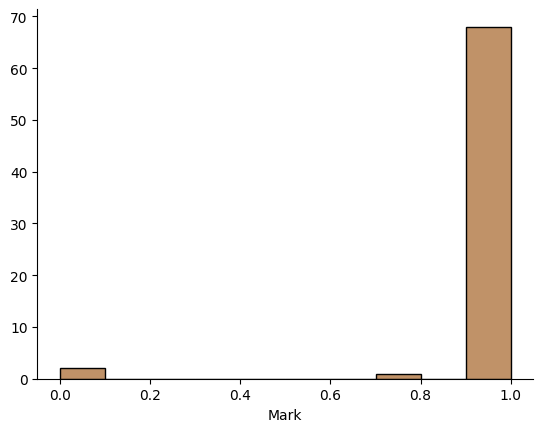

In [46]:
submissions_hist(2984).show()

In [47]:
def submissions_user_n_submissions(user_id):
    
    submissions =  pd.read_csv("./../../data/dataset.csv")
    submissions = submissions[['userid', 'aula_id', 'activitat',"activitat_id", 'datesubmitted', 'attempt_number', 'mark']]
    submissions

    submissions_user = submissions[submissions["userid"] == user_id]
    submissions_user

    n_submissions = sum(submissions_user["attempt_number"])
    return n_submissions
    

In [49]:
submissions_user_n_submissions(2984)

C:\Users\Aleix\AppData\Local\Temp\ipykernel_7204\1666364076.py:3: DtypeWarning: Columns (11,12,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions =  pd.read_csv("./../../data/dataset.csv")


121.0

In [50]:
user_id = 2984
submissions_user = submissions[submissions["userid"] == user_id]
submissions_user

,userid,aula_id,activitat,activitat_id,datesubmitted,attempt_number,mark
101217,2984,184,Problema 1.1 - Hello world!!!,3799.0,2024-09-29 21:14:08,2.0,1.0
101218,2984,184,Problema 1.2 - Hello world!!! ++,3800.0,2024-09-29 21:21:39,3.0,1.0
101219,2984,184,Problema 3a.1: Càlcul edat,3801.0,2024-09-30 09:15:42,1.0,1.0
101220,2984,184,Problema 3a.8: Conversió dòlars a euros,3802.0,2024-09-30 09:26:37,2.0,1.0
101221,2984,184,Problema 3a.11: Mitjana de notes,3803.0,2024-09-30 09:34:40,1.0,1.0
...,...,...,...,...,...,...,...
101283,2984,184,Problema 5.7: Centenes d'un nombre,3880.0,2024-10-20 12:40:25,1.0,1.0
101284,2984,184,Problema 5.13: Sèrie de Fibonacci,3882.0,2024-10-20 12:49:00,2.0,1.0
101285,2984,184,Problema 5.3: Alerta,3887.0,2024-10-20 13:03:58,1.0,1.0
101286,2984,184,Problema 5.4: Temps d'execució,3890.0,2024-10-21 06:26:41,1.0,0.0


In [55]:
submissions["aula_id"].value_counts()

aula_id
143    25929
92     23034
176    16819
141    14777
87     12899
184     7830
Name: count, dtype: int64

In [54]:
activities[activities["aula_id"] == 184]

,activitat_id,activitat,aula_id,startdate,duedate,grade
1566,3799,Problema 1.1 - Hello world!!!,184,0,0,100
1567,3800,Problema 1.2 - Hello world!!! ++,184,0,0,100
1568,3801,Problema 3a.1: Càlcul edat,184,0,0,100
1569,3802,Problema 3a.8: Conversió dòlars a euros,184,0,0,100
1570,3803,Problema 3a.11: Mitjana de notes,184,0,0,100
...,...,...,...,...,...,...
1793,4058,Problema 8.1: Classe Point,184,0,0,100
1794,4059,Problema 8.2: Classe Rectangle,184,0,0,100
1795,4060,Problema 5a.3: Nombre d'aprovats,184,0,0,100
1796,4194,(OPCIONAL) Problema 9.24 Triple pitagòric,184,0,0,100


In [30]:
n_submissions = sum(submissions_user["attempt_number"])
n_submissions

293.0

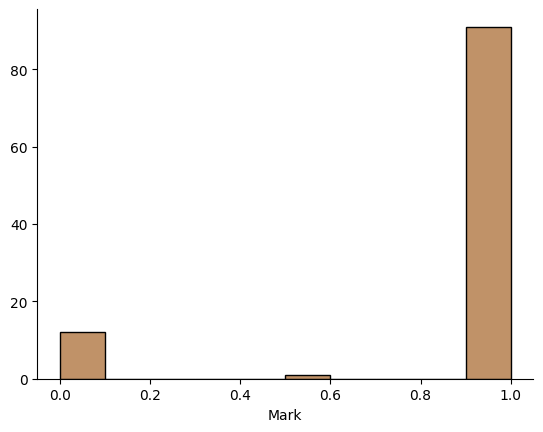

In [31]:
import matplotlib.pyplot as plt

    # Crear el histograma con un estilo minimalista
    plt.hist(submissions_user['mark'], bins=10, color='#c09268', edgecolor='black')

    # Remover los bordes y mantener solo el gráfico
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)

    # Solo mostrar ticks en el eje x
    plt.tick_params(axis='y', which='both', left=True, right=False)
    plt.tick_params(axis='x', which='both', bottom=True, top=False)

    # Etiquetas para el eje x y el título
    plt.xlabel('Mark')

    # Mostrar el gráfico
    plt.show()



mark
1.00    87
0.00    12
0.96     2
0.50     1
0.97     1
0.99     1
Name: count, dtype: int64